# 오픈데이터 활용

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

### 데이터분석 미션
- 과제1 : 남자/여자 수, 객실 등급별 수
- 과제2 : 연령대별 수 ( 10대 : OO명, 20대 : OO명, 30대 : OO명 )
- 과제3 : 남여별/객실등급별 생존자수를 그래프로 표현

### 데이터 다운로드 및 분석

In [2]:
df = pd.read_csv("data/kaggle_titanic_train.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.groupby("Sex").size()

Sex
female    314
male      577
dtype: int64

In [4]:
df.groupby("Pclass").size()

Pclass
1    216
2    184
3    491
dtype: int64

In [5]:
df.groupby(["Pclass", "Sex"]).size()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

In [6]:
import math

In [7]:
age_series = df.Age.dropna().apply(lambda age: math.floor(age/10)*10)
age_series

0      20
1      30
2      20
3      30
4      30
6      50
7       0
8      20
9      10
10      0
11     50
12     20
13     30
14     10
15     50
16      0
18     30
20     30
21     30
22     10
23     20
24      0
25     30
27     10
30     40
33     60
34     20
35     40
37     20
38     10
       ..
856    40
857    50
858    20
860    40
861    20
862    40
864    20
865    40
866    20
867    30
869     0
870    20
871    40
872    30
873    40
874    20
875    10
876    20
877    10
879    50
880    20
881    30
882    20
883    20
884    20
885    30
886    20
887    10
889    20
890    30
Name: Age, Length: 714, dtype: int64

In [9]:
math.floor(3.2)

3

In [11]:
age_series.name = "Age_Group"

In [12]:
age_series[:10]

0     20
1     30
2     20
3     30
4     30
6     50
7      0
8     20
9     10
10     0
Name: Age_Group, dtype: int64

In [13]:
df = pd.concat(
[df, age_series],
axis=1
)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,50.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,20.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,10.0


In [14]:
df.Age_Group = df.Age_Group.fillna("확인불명")

In [15]:
df.Age_Group.head(10)

0      20
1      30
2      20
3      30
4      30
5    확인불명
6      50
7       0
8      20
9      10
Name: Age_Group, dtype: object

In [16]:
age_group_df = df.groupby("Age_Group").size()
age_group_df

Age_Group
0.0      62
10.0    102
20.0    220
30.0    167
40.0     89
50.0     48
60.0     19
70.0      6
80.0      1
확인불명    177
dtype: int64

In [17]:
df.groupby("Age_Group").size()

Age_Group
0.0      62
10.0    102
20.0    220
30.0    167
40.0     89
50.0     48
60.0     19
70.0      6
80.0      1
확인불명    177
dtype: int64

In [18]:
df.groupby("Pclass").agg({"Survived": "mean"})

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [21]:
df.groupby("Sex").agg({"Survived": "sum"})

,Survived
Sex,
female,233
male,109


In [22]:
233/314, 109/577

(0.7420382165605095, 0.18890814558058924)

In [25]:
pd.crosstab(
df.Sex,
df.Pclass,
margins=True,
)

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


In [26]:
df.pivot_table(
"Survived",
"Sex",
"Pclass")

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [27]:
df.groupby(["Pclass", "Sex"]).size().unstack(1)

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [30]:
temp_df=df.groupby(["Pclass", "Sex"]).size().unstack(0)
temp_df

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [34]:
result_df = temp_df.div(temp_df.sum(axis=1), axis=0)
result_df

Pclass,1,2,3
Sex,,,
female,0.299363,0.242038,0.458599
male,0.211438,0.187175,0.601386


### 데이터 시각화

In [35]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

%matplotlib inline

In [36]:
plt.rcParams['figure.figsize'] = (12,8)

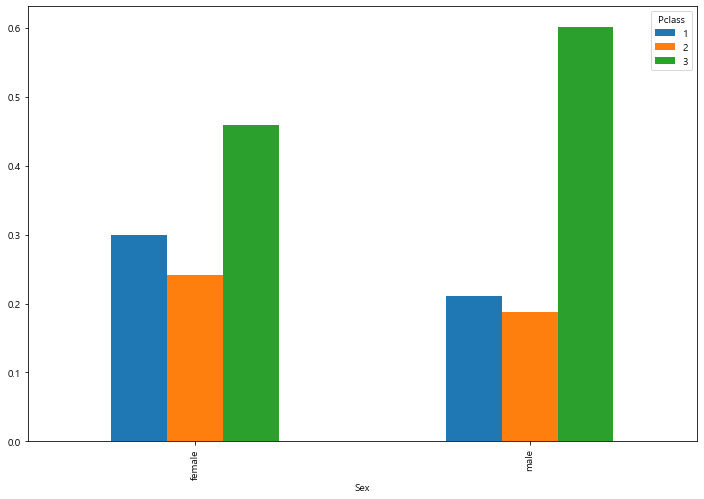

In [37]:
bar_plot = result_df.plot.bar();

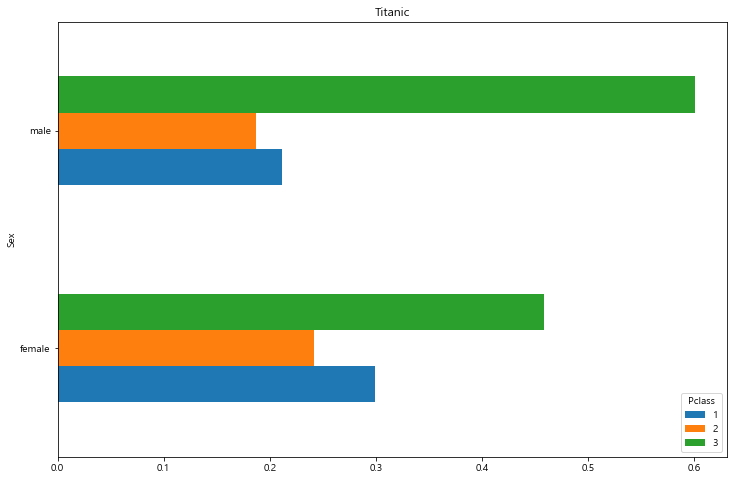

In [38]:
result_df.plot(kind="barh", title="Titanic")

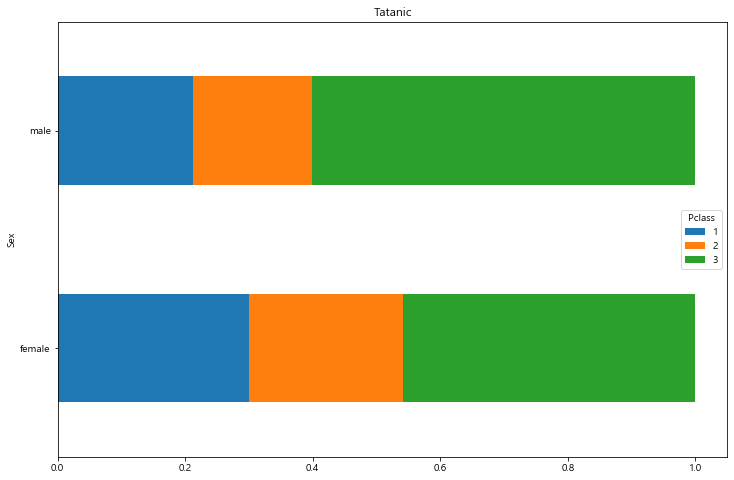

In [40]:
result_df.plot(kind="barh", title="Tatanic", stacked=True)

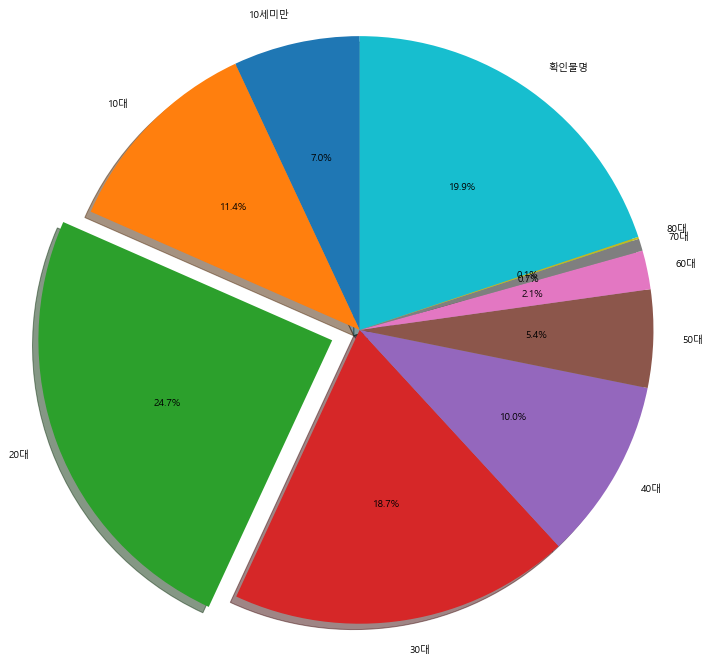

In [51]:
plt.rcParams['figure.figsize'] = (12,12)

# labels = list(age_group_df.index)
labels = ['10세미만', '10대', '20대', '30대', '40대', '50대', '60대',
          '70대', '80대', '확인불명']
sizes = list(age_group_df.values)
explode = (0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [52]:
list(age_group_df.index)

[0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, '확인불명']

In [53]:
age_group_df.values

array([ 62, 102, 220, 167,  89,  48,  19,   6,   1, 177], dtype=int64)